In [2]:
# Import dependencies and setup

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [4]:
# Load and preview dataset

raw_df = pd.read_csv('../Resources/coal_generation.csv', index_col='Year', parse_dates=True)
raw_df

,EV_PHEV
Year,
2011-01-01,49
2012-01-01,253
2013-01-01,293
2014-01-01,1322
2015-01-01,1771
2016-01-01,1369
2017-01-01,2287
2018-01-01,2216
2019-01-01,6718


In [73]:
# Prepare for Prophet
# Reset index

df = raw_df.reset_index()
df.head()

,Year,Coal
0,1974-01-01,981.1
1,1975-01-01,981.2
2,1976-01-01,1047.7
3,1977-01-01,1070.4
4,1978-01-01,1103.0


In [74]:
# Rename 'Year' and 'Coal' to 'ds' and 'y', respectively

df = df.rename(columns={'Year':'ds', 'Coal':'y'})
df.head()

,ds,y
0,1974-01-01,981.1
1,1975-01-01,981.2
2,1976-01-01,1047.7
3,1977-01-01,1070.4
4,1978-01-01,1103.0


<AxesSubplot:xlabel='ds'>

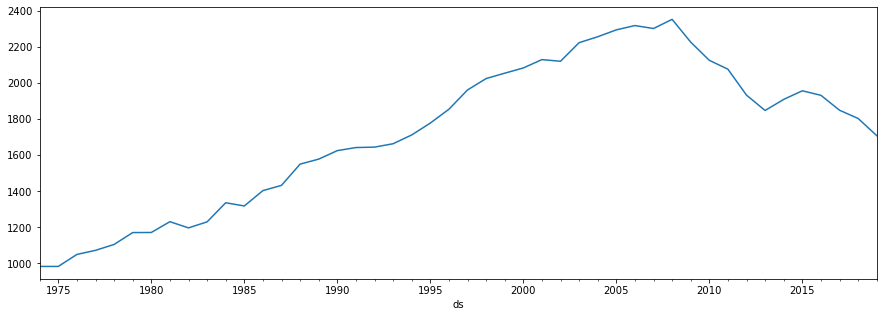

In [75]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [76]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

,ds,y
41,2015-01-01,7.578094
42,2016-01-01,7.565275
43,2017-01-01,7.521480
44,2018-01-01,7.496430
45,2019-01-01,7.442258


<AxesSubplot:xlabel='ds'>

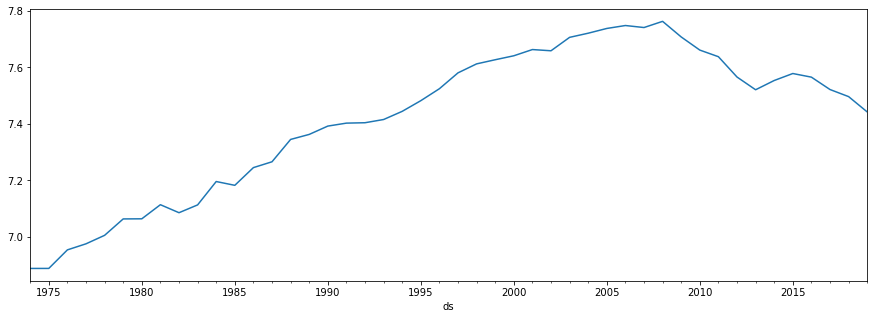

In [77]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [78]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [79]:
# Add future dates to model (5 years / 60 months)

future = model.make_future_dataframe(periods=10, freq = 'y')
future.tail()

,ds
51,2024-12-31
52,2025-12-31
53,2026-12-31
54,2027-12-31
55,2028-12-31


In [80]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
51,2024-12-31,0.725880,7.281294,7.362160,0.699668,0.752424,6.596035,6.596035,6.596035,4.770405,...,-0.010535,-0.010535,-0.010535,1.836165,1.836165,1.836165,0.0,0.0,0.0,7.321915
52,2025-12-31,0.702456,7.275333,7.365407,0.668999,0.737281,6.615122,6.615122,6.615122,4.770405,...,-0.005884,-0.005884,-0.005884,1.850602,1.850602,1.850602,0.0,0.0,0.0,7.317579
53,2026-12-31,0.679033,7.279440,7.383913,0.637441,0.722693,6.651325,6.651325,6.651325,4.770405,...,0.011863,0.011863,0.011863,1.869058,1.869058,1.869058,0.0,0.0,0.0,7.330358
54,2027-12-31,0.655609,7.258311,7.383079,0.605276,0.708788,6.664210,6.664210,6.664210,4.770405,...,0.002231,0.002231,0.002231,1.891575,1.891575,1.891575,0.0,0.0,0.0,7.319819
55,2028-12-31,0.632120,7.168220,7.306115,0.574549,0.696391,6.605808,6.605808,6.605808,4.770405,...,-0.000761,-0.000761,-0.000761,1.836165,1.836165,1.836165,0.0,0.0,0.0,7.237929


In [81]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
51,2024-12-31,7.321915,7.281294,7.362160
52,2025-12-31,7.317579,7.275333,7.365407
53,2026-12-31,7.330358,7.279440,7.383913
54,2027-12-31,7.319819,7.258311,7.383079
55,2028-12-31,7.237929,7.168220,7.306115


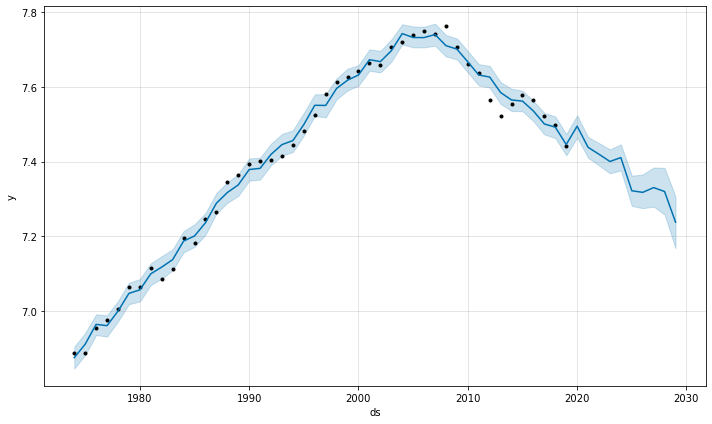

In [82]:
# Plot forecast

model.plot(forecast);

In [83]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [84]:
# Combine both dataframes

vis_df = raw_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,Coal,yhat,yhat_lower,yhat_upper
1974-01-01,981.1,6.875583,6.846414,6.905229
1975-01-01,981.2,6.911602,6.882684,6.941763
1976-01-01,1047.7,6.964561,6.936228,6.991465
1977-01-01,1070.4,6.961097,6.931829,6.988713
1978-01-01,1103.0,7.000052,6.972515,7.027168


In [85]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,Coal,yhat,yhat_lower,yhat_upper,yhat_rescaled
1974-01-01,981.1,6.875583,6.846414,6.905229,968.339865
1975-01-01,981.2,6.911602,6.882684,6.941763,1003.853715
1976-01-01,1047.7,6.964561,6.936228,6.991465,1058.450086
1977-01-01,1070.4,6.961097,6.931829,6.988713,1054.790150
1978-01-01,1103.0,7.000052,6.972515,7.027168,1096.690475


<AxesSubplot:>

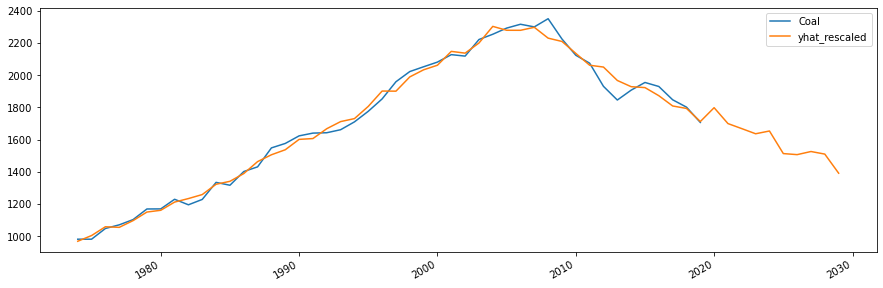

In [86]:
# Plot 'Coal' and 'yhat_rescaled'

vis_df[['Coal', 'yhat_rescaled']].plot()

In [87]:
# Ensure crude_oil and model data are connected

raw_df.index = pd.to_datetime(raw_df.index) #make sure our index as a datetime object
connect_date = raw_df.index[-2] #select the 2nd to last date

In [88]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [89]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.866488,7.416626,7.473087,0.866488,0.866488,6.579008,6.579008,6.579008,4.770405,4.770405,...,-0.010535,-0.010535,-0.010535,1.819139,1.819139,1.819139,0.0,0.0,0.0,7.445497
2019-12-31,0.843129,7.464180,7.523571,0.842039,0.843986,6.651444,6.651444,6.651444,4.770405,4.770405,...,-0.010535,-0.010535,-0.010535,1.891575,1.891575,1.891575,0.0,0.0,0.0,7.494573
2020-12-31,0.819641,7.409971,7.465528,0.815297,0.824107,6.618433,6.618433,6.618433,4.770405,4.770405,...,0.011863,0.011863,0.011863,1.836165,1.836165,1.836165,0.0,0.0,0.0,7.438073
2021-12-31,0.796217,7.389780,7.449319,0.787666,0.804618,6.623238,6.623238,6.623238,4.770405,4.770405,...,0.002231,0.002231,0.002231,1.850602,1.850602,1.850602,0.0,0.0,0.0,7.419454
2022-12-31,0.772793,7.368361,7.432422,0.759206,0.785979,6.627342,6.627342,6.627342,4.770405,4.770405,...,-0.012120,-0.012120,-0.012120,1.869058,1.869058,1.869058,0.0,0.0,0.0,7.400135


In [90]:
# Create updated dataframe

vis_df = raw_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [94]:
# Preview head

vis_df.head()

,Coal,yhat,yhat_lower,yhat_upper,yhat_scaled
1974-01-01,981.1,NaN,NaN,NaN,NaN
1975-01-01,981.2,NaN,NaN,NaN,NaN
1976-01-01,1047.7,NaN,NaN,NaN,NaN
1977-01-01,1070.4,NaN,NaN,NaN,NaN
1978-01-01,1103.0,NaN,NaN,NaN,NaN


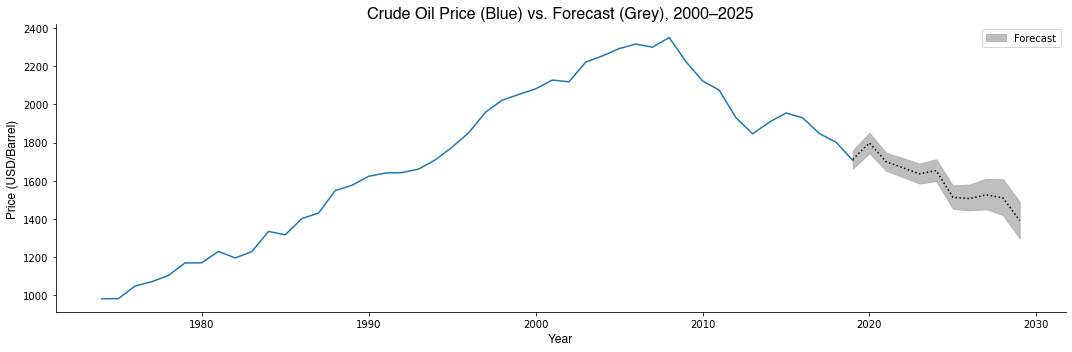

In [92]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.Coal)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Coal generation in petajoules (Blue) vs. Forecast (Grey), 1974–2028', fontdict = font_1)
ax1.set_ylabel('Price (USD/Barrel)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
#plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/Crude Oil/crude_oil_price_forecast.png", 
           #transparent=False, dpi=300)
plt.show()